# HSV vs RGB Color Space - Balloons
Demonstrate the improved reliability of HSV color space for detecting coloured objects with uneven lighting inconsistent colour. Aim to select only the pink balloons.

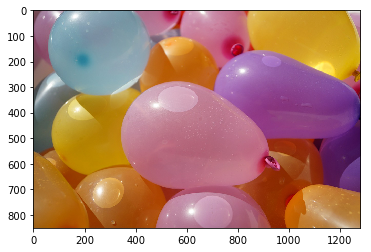

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

image = cv2.imread('images/balloons.jpg')

# copy and convert to RGB from cv2 BGR
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Plot Color Channels Intensity

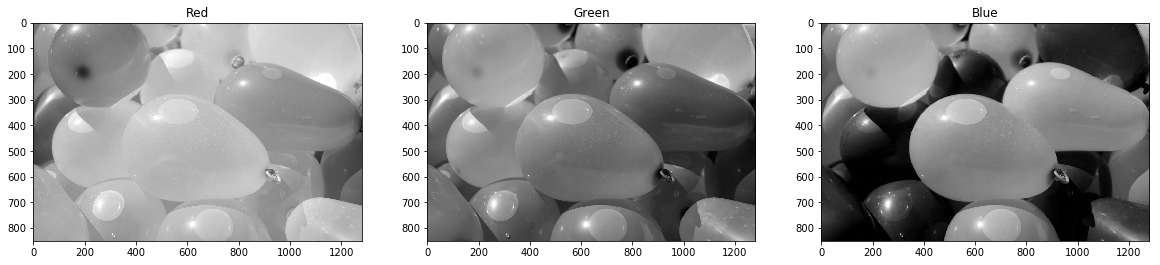

In [13]:
# RGB channels
r = image_copy[:, :, 0]
g = image_copy[:, :, 1]
b = image_copy[:, :, 2]

# plot channels in grayscale to see relative intensities
named_channels = [('Red', r),('Green', g), ('Blue', b)]

fig, axes = plt.subplots(1, 3, figsize=(20,10))

for ax, named_channel in zip(axes, named_channels):
    name, channel = named_channel
    ax.set_title(name)
    ax.imshow(channel, cmap='gray')

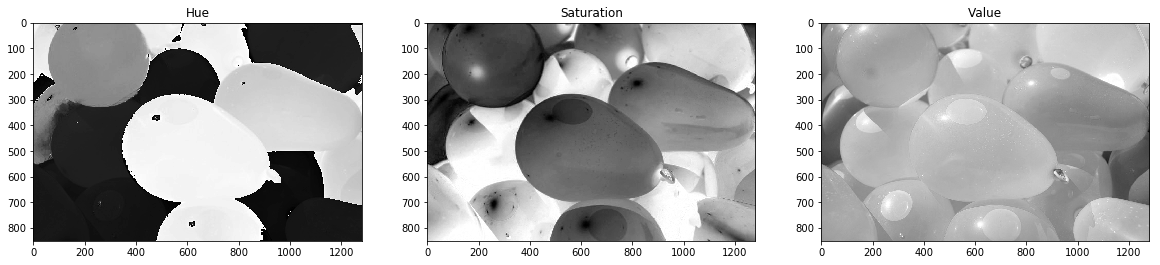

In [15]:
# Convert from RGB to HSV
hsv_image = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv_image[:, :, 0]
s = hsv_image[:, :, 1]
v = hsv_image[:, :, 2]

# plot channels in grayscale to see relative intensities
named_channels = [('Hue', h),('Saturation', s), ('Value', v)]

fig, axes = plt.subplots(1, 3, figsize=(20,10))

for ax, named_channel in zip(axes, named_channels):
    name, channel = named_channel
    ax.set_title(name)
    ax.imshow(channel, cmap='gray')

## Define Selection Thresholds

In [16]:
# pink color selection boundaries for RGB
# some high values of red and some medium values of blue
lower_pink = np.array([180,0,100])
upper_pink = np.array([255,255,230])

# hue selection boundaries for HSV
# hue is from 0->180 degrees
# narrow and high range for hue, any saturation/value values
lower_hue = np.array([160, 0, 0])
upper_hue = np.array([180, 255,255])

## Mask Image

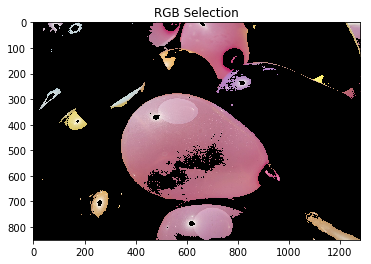

In [17]:
# RGB mask

mask_rgb = cv2.inRange(image_copy, lower_pink, upper_pink)

# copy and mask
masked_image = np.copy(image_copy)
masked_image[mask_rgb==0] = [0,0,0]

plt.imshow(masked_image)
plt.title('RGB Selection')

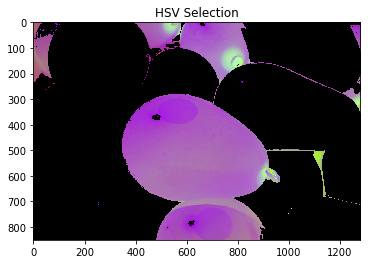

In [18]:
# HSV mask

mask_hsv = cv2.inRange(hsv_image, lower_hue, upper_hue)

# copy and mask
masked_image = np.copy(hsv_image)
masked_image[mask_hsv==0] = [0,0,0]

plt.imshow(masked_image)
plt.title('HSV Selection')

Pink balloons are almost all selected successfully when using HSV. RGB is missing several balloons entirely and the ones that are selected have sections missing.